In [2]:
import pandas_datareader as web
import pandas as pd
import plotly.express as px
import numpy as np
import json

# Extraindo as ações do Índice BOVESPA com os seus respectivos setores

In [25]:
import pandas as pd
acoes = pd.read_html('https://blog.toroinvestimentos.com.br/empresas-listadas-b3-bovespa', decimal=',')
acoes_setores = acoes[1]
acoes_setores.columns = acoes_setores.iloc[0]
acoes_setores.drop(index=0,inplace=True)
acoes_setores_dict = acoes_setores[['Ticker','Setor']].to_dict(orient='list')

In [30]:
# Para renomear as chaves do dicionário,ver: https://stackoverflow.com/questions/16475384/rename-a-dictionary-key
translation = {'Alimentos':'Food', 'Aluguel de Veículos':'Vehicle Rent', 
               'Bens Industriais':'Industrial Goods', 'Companhia aérea':'Flight Companies',
              'Comércio':'Commerce','Construção Civil':'Construction','Construção':'Real Estate'.
              'Educação':'Education',  'Energia Elétrica':'Eletric Energy','Financeiro':'Finance',
              '}
set(acoes_setores_dict['Setor'])#['Bens Industriais']

{'Alimentos',
 'Aluguel de Veículos',
 'Bens Industriais',
 'Bens industriais',
 'Companhia aérea',
 'Comércio',
 'Construção',
 'Construção civil',
 'Educação',
 'Energia Elétrica',
 'Energia elétrica',
 'Exploração de imóveis',
 'Financeiro',
 'Locação de veículos',
 'Madeira e papel',
 'Mineração',
 'Petróleo e Gás',
 'Químicos',
 'Saneamento',
 'Saúde',
 'Seguros',
 'Shopping Centers',
 'Siderurgia e Metalurgia',
 'Tecnologia',
 'Telecomunicações',
 'Varejo',
 'Viagens e lazer'}

In [115]:
import json
with open("sector_stocks.json", "w") as outfile:
    json.dump(d, outfile)

In [62]:
# Dicionário com os setores econômicos e suas respectivas ações (essencial para o Dropdown)
d = {}
for acao, setor in zip(acoes_setores_dict['Ticker'], acoes_setores_dict['Setor']):
    if setor not in d.keys():
        d[setor] = [acao]
    else:
        d[setor].append(acao)
# Removendo setores redundantes
d['Bens Industriais'].extend(d['Bens industriais'])
d.pop('Bens industriais')
d['Bens Industriais']
d['Energia Elétrica'].extend(d['Energia elétrica'])
d.pop('Energia elétrica')
d['Energia Elétrica']
d['Aluguel de Veículos'].extend(d['Locação de veículos'])
d.pop('Locação de veículos')
d['Construção civil'].extend(d['Construção'])
d.pop('Construção')
d['Shopping Centers'].extend(d['Exploração de imóveis'])
d.pop('Exploração de imóveis')


{'Alimentos': ['ABEV3', 'BRFS3', 'CSAN3', 'JBSS3', 'MRFG3', 'BEEF3'],
 'Varejo': ['ASAI3',
  'BTOW3',
  'CRFB3',
  'HGTX3',
  'NTCO3',
  'HYPE3',
  'LAME4',
  'LREN3',
  'MGLU3',
  'PCAR3'],
 'Companhia aérea': ['AZUL4'],
 'Seguros': ['B3SA3', 'BBSE3', 'IRBR3', 'SULA11'],
 'Shopping Centers': ['VRML3', 'MULT3', 'IGTA3'],
 'Financeiro': ['BBDC4',
  'BBDC3',
  'BBAS3',
  'CIEL3',
  'ITSA4',
  'ITUB4',
  'SANB11'],
 'Mineração': ['BRAP4', 'VALE3'],
 'Químicos': ['BRKM5'],
 'Educação': ['COGN3', 'YDUQ3'],
 'Energia Elétrica': ['CPLE6',
  'CPFE3',
  'ELET6',
  'CMIG4',
  'ELET3',
  'ENBR3',
  'ENGI11',
  'ENEV3',
  'ENGIE3',
  'EQTL3',
  'TAEE11'],
 'Viagens e lazer': ['CVCB3'],
 'Construção civil': ['CYRE3', 'MRVE3', 'EZTC3', 'JHSF3'],
 'Saúde': ['FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RADL3'],
 'Siderurgia e Metalurgia': ['GGBR4', 'GOAU4', 'CSNA3', 'USIM5'],
 'Madeira e papel': ['KLBN11', 'SUZB5'],
 'Aluguel de Veículos': ['LCAM3', 'RENT3'],
 'Petróleo e Gás': ['PETR3', 'PETR4', 'BRDT3', 'PR

In [63]:
d.keys()

dict_keys(['Alimentos', 'Varejo', 'Companhia aérea', 'Seguros', 'Shopping Centers', 'Financeiro', 'Mineração', 'Químicos', 'Educação', 'Energia Elétrica', 'Viagens e lazer', 'Construção civil', 'Saúde', 'Siderurgia e Metalurgia', 'Madeira e papel', 'Aluguel de Veículos', 'Petróleo e Gás', 'Saneamento', 'Telecomunicações', 'Tecnologia', 'Comércio', 'Bens Industriais'])

In [64]:
translate = {'Alimentos':'Food & Beverages', 'Varejo':'Retail', 'Companhia aérea':'Aerospace',
            'Seguros':'Insurace', 'Shopping Centers':'Shopping Malls', 'Financeiro':'Finance',
            'Mineração':'Mining','Químicos':'Chemical', 'Educação':'Education',
             'Energia Elétrica':'Electrical Energy','Viagens e lazer':'Traveling',
            'Construção civil':'Real Estate','Saúde':'Health','Siderurgia e Metalurgia':'Steel & Metallurgy',
            'Madeira e papel':'Wood & Paper', 'Aluguel de Veículos':'Vehicle Rental', 
             'Petróleo e Gás':'Oil & Gas', 'Saneamento':'Sanitation','Telecomunicações':'Telecommunication',
            'Tecnologia':'Technology','Comércio':'Commerce','Bens Industriais':'Industrial Goods'}
translate.values()

dict_values(['Food & Beverages', 'Retail', 'Aerospace', 'Insurace', 'Shopping Malls', 'Finance', 'Mining', 'Chemical', 'Education', 'Electrical Energy', 'Traveling', 'Real Estate', 'Health', 'Steel & Metallurgy', 'Wood & Paper', 'Vehicle Rental', 'Oil & Gas', 'Sanitation', 'Telecommunication', 'Technology', 'Commerce', 'Industrial Goods'])

In [65]:
for key, value in translate.items():
    d[value] = d.pop(key)
d

{'Food & Beverages': ['ABEV3', 'BRFS3', 'CSAN3', 'JBSS3', 'MRFG3', 'BEEF3'],
 'Retail': ['ASAI3',
  'BTOW3',
  'CRFB3',
  'HGTX3',
  'NTCO3',
  'HYPE3',
  'LAME4',
  'LREN3',
  'MGLU3',
  'PCAR3'],
 'Aerospace': ['AZUL4'],
 'Insurace': ['B3SA3', 'BBSE3', 'IRBR3', 'SULA11'],
 'Shopping Malls': ['VRML3', 'MULT3', 'IGTA3'],
 'Finance': ['BBDC4', 'BBDC3', 'BBAS3', 'CIEL3', 'ITSA4', 'ITUB4', 'SANB11'],
 'Mining': ['BRAP4', 'VALE3'],
 'Chemical': ['BRKM5'],
 'Education': ['COGN3', 'YDUQ3'],
 'Electrical Energy': ['CPLE6',
  'CPFE3',
  'ELET6',
  'CMIG4',
  'ELET3',
  'ENBR3',
  'ENGI11',
  'ENEV3',
  'ENGIE3',
  'EQTL3',
  'TAEE11'],
 'Traveling': ['CVCB3'],
 'Real Estate': ['CYRE3', 'MRVE3', 'EZTC3', 'JHSF3'],
 'Health': ['FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RADL3'],
 'Steel & Metallurgy': ['GGBR4', 'GOAU4', 'CSNA3', 'USIM5'],
 'Wood & Paper': ['KLBN11', 'SUZB5'],
 'Vehicle Rental': ['LCAM3', 'RENT3'],
 'Oil & Gas': ['PETR3', 'PETR4', 'BRDT3', 'PRIO3', 'UGPA3'],
 'Sanitation': ['SBSP3'],
 '

In [24]:
a = {'A':1, 'B':2, 'C':3}
a.keys()[0]

TypeError: 'dict_keys' object is not subscriptable

In [113]:
# Testando a funcionalidade de extração das médias das ações (para o cartão de desempenho de setor)
np.mean([web.DataReader(f'{acao}.SA', 'yahoo', start='01-01-2015', end='31-12-2021')['Adj Close'].mean() for acao in d['Mineração']])

27.30496806537323

In [116]:
# Extraindo os dados de uma certa ação pertencente ao nosso dicionário.
web.DataReader('{}.SA'.format(acoes_setores_dict['Ticker'][0]),'yahoo', start='01/01/2015', end = '31/12/2021').reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,16.559999,15.770000,16.139999,16.020000,19396500.0,12.145534
1,2015-01-05,15.970000,15.540000,15.910000,15.730000,13795900.0,11.925672
2,2015-01-06,16.420000,15.560000,15.730000,16.330000,18610500.0,12.380562
3,2015-01-07,16.719999,16.139999,16.340000,16.559999,20493500.0,12.554935
4,2015-01-08,16.680000,16.260000,16.430000,16.540001,9054500.0,13.311451
...,...,...,...,...,...,...,...
1733,2021-12-23,15.670000,15.340000,15.400000,15.550000,10634700.0,15.550000
1734,2021-12-27,15.650000,15.480000,15.550000,15.530000,8437200.0,15.530000
1735,2021-12-28,15.570000,15.400000,15.540000,15.520000,7701300.0,15.520000
1736,2021-12-29,15.560000,15.340000,15.550000,15.450000,8847300.0,15.450000


In [128]:
a = web.DataReader('^BVSP', 'yahoo', start='01-01-2015', end='31-12-2021')['Adj Close']

In [129]:
b= web.DataReader('ABEV3.SA', 'yahoo', start='01-01-2015', end='31-12-2021')['Adj Close']

In [130]:
for date in b.index:
    if date not in a.index:
        print(date)

2017-06-15 00:00:00
2017-09-07 00:00:00
2017-10-12 00:00:00
2017-11-02 00:00:00
2017-11-15 00:00:00
2017-11-20 00:00:00
2017-12-25 00:00:00
2018-01-25 00:00:00


In [9]:
web.DataReader('BRDT3.SA', 'yahoo', '01-01-2015', '31-12-2021')

RemoteDataError: No data fetched for symbol BRDT3.SA using YahooDailyReader

In [7]:
# Removendo as ações que não são retornadas pelo Yahoo.
sector_stocks = json.load(open('sector_stocks.json', 'r'))
for sector in sector_stocks.keys():
    for stock in sector_stocks[sector]:
        try:
            web.DataReader(f'{stock}.SA', 'yahoo', '01-01-2015', '31-12-2021')
        except:
            sector_stocks[sector].remove(stock)
            print(f'{stock} do setor {sector}', sector_stocks[sector])

BTOW3 do setor Varejo ['ASAI3', 'CRFB3', 'HGTX3', 'NTCO3', 'HYPE3', 'LAME4', 'LREN3', 'MGLU3', 'PCAR3']
HGTX3 do setor Varejo ['ASAI3', 'CRFB3', 'NTCO3', 'HYPE3', 'LAME4', 'LREN3', 'MGLU3', 'PCAR3']
LAME4 do setor Varejo ['ASAI3', 'CRFB3', 'NTCO3', 'HYPE3', 'LREN3', 'MGLU3', 'PCAR3']
VRML3 do setor Shopping Centers ['MULT3']
ENGIE3 do setor Energia elétrica ['CMIG4', 'ELET3', 'ENBR3', 'ENGI11', 'ENEV3', 'EQTL3', 'TAEE11']
GNDI3 do setor Saúde ['FLRY3', 'HAPV3', 'QUAL3', 'RADL3']
IGTA3 do setor Exploração de imóveis []
SUZB5 do setor Madeira e papel ['KLBN11']
BRDT3 do setor Petróleo e Gás ['PETR3', 'PETR4', 'PRIO3', 'UGPA3']
VIVT4 do setor Telecomunicações ['TIMP3']
VVAR3 do setor Comércio []


In [32]:
import json
sector_stocks = json.load(open('sector_stocks.json', 'r'))
carousel_stocks = list(sector_stocks.values())[0]
for sector in list(sector_stocks.values())[1:]:
    carousel_stocks.extend(sector)
carousel_stocks = sorted(carousel_stocks)
carousel_stocks

['ABEV3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'ECOR3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'JHSF3',
 'KLBN11',
 'LCAM3',
 'LREN3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RENT3',
 'SANB11',
 'SBSP3',
 'SULA11',
 'TAEE11',
 'TIMP3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'WEGE3',
 'YDUQ3']

In [74]:
import datetime
datetime.datetime.now().date() - datetime.timedelta(days = 7 * 52)

datetime.date(2021, 4, 13)

In [79]:
import pandas_datareader as web
start = datetime.datetime.now().date() - datetime.timedelta(days = 7 * 52)
bvsp = web.DataReader('^BVSP', 'yahoo',start = start, end= datetime.datetime.now().date())['Close']

In [80]:
abev = web.DataReader('ABEV3.SA', 'yahoo',start = start, end= datetime.datetime.now().date())['Close']

In [88]:
from scipy.stats import pearsonr
pd.merge(abev, bvsp, left_index=True, right_index=True).corr().iloc[0,1]

0.5185997796841446

In [2]:
import json
a = json.load(open('sector_stocks.json', 'r'))

In [34]:
import pandas as pd
import pandas_datareader as web
import datetime
start = datetime.datetime(2021, 12, 31).date() - \
        datetime.timedelta(days=7 * 52)
end = datetime.datetime(2021, 12, 31).date()
index = pd.date_range(start=start, end=end)
columns = [i for i in a['Food & Beverages']]
x = pd.DataFrame()
for stock in columns:
    x[stock] = web.DataReader(f'{stock}.SA', 'yahoo', start=start, end=end)['Close']
x

,ABEV3,BRFS3,CSAN3,JBSS3,MRFG3,BEEF3
Date,,,,,,
2021-01-04,15.480000,21.480000,19.809999,23.410000,14.300000,10.04
2021-01-05,15.810000,21.309999,19.872499,23.750000,14.210000,9.84
2021-01-06,16.129999,21.250000,19.825001,23.540001,13.780000,9.70
2021-01-07,16.049999,21.930000,20.597500,23.830000,13.840000,9.65
2021-01-08,16.530001,21.980000,20.562500,24.400000,14.010000,9.73
...,...,...,...,...,...,...
2021-12-23,15.550000,22.620001,21.150000,37.720001,22.730000,10.53
2021-12-27,15.530000,22.230000,21.410000,37.470001,22.270000,10.43
2021-12-28,15.520000,22.590000,21.450001,37.889999,22.780001,10.55


In [125]:
from pandas_ta import macd, bbands, ad
import pandas_datareader as web
df = web.DataReader('ABEV3.SA','yahoo', start='2015-01-01', end='2021-12-31')

<AxesSubplot:xlabel='Date'>

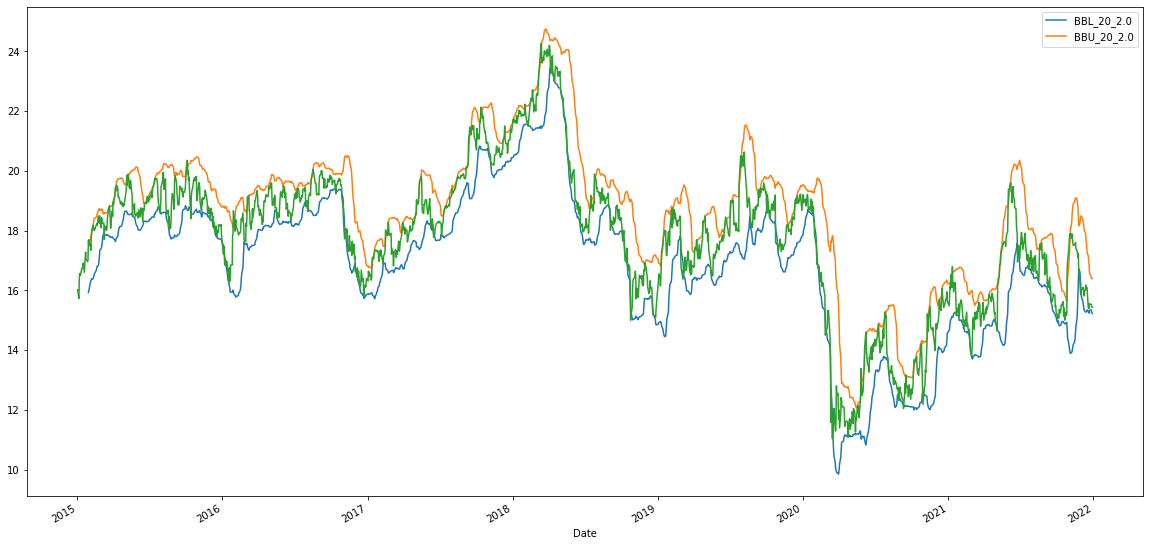

In [45]:
import numpy as np
bbands(df['Close'], length=20, std=2).iloc[:, [0,2]].plot(figsize=(20,10))
df['Close'].plot()

In [123]:
a = bbands(df['Close'], length=20, std=2).iloc[:, :3]

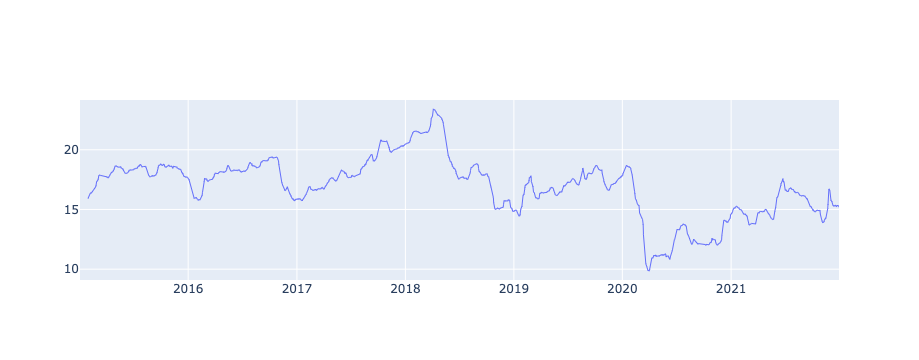

In [128]:
import plotly.express as px
import plotly.graph_objects as go
a = bbands(df['Close'], length=20, std=2).iloc[:, :3]
fig = go.Figure()
fig.add_trace(go.Scatter(x=a.index, y=a.iloc[:,0], line={'width':1}))
#px.line(x = a.index, y=a.iloc[:, 1])

In [94]:
import json
import pandas_datareader as web
sector_stocks = json.load(open('sector_stocks.json', 'r'))